In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')


In [3]:
news = pd.read_csv("../data/train_bert.csv", index_col=0)
print(news)

              date                                            content  \
symbol                                                                  
META    2022-11-05  Twitter co-founder Jack Dorsey admits he grew ...   
META    2022-11-05  The Fall of Big Tech Is Boosting Stock Quants ...   
META    2022-11-05  Meta Stock: Mr. Market Shorted Zuckerberg; Fut...   
META    2022-11-05  What stock investors should watch for in the m...   
META    2022-11-05                Meta Lesson 1: Corporate Governance   
...            ...                                                ...   
NFLX    2021-01-22  UBS Upgrades Disney On Streaming Strength, Val...   
NFLX    2021-01-22  This New Action Film Directed By RZA Is Now Th...   
NFLX    2021-01-22  IBM, Intel Pressure Stocks Along With Worry Ab...   
NFLX    2021-01-22  Did You Miss This Valuable Info in Netflix's L...   
NFLX    2021-01-22  Netflix Beat Subscriber Expectations by Return...   

        preprice  latprice      match  sentiment  

In [4]:
print(news[news.index == 'META'].shape)

(1484, 7)


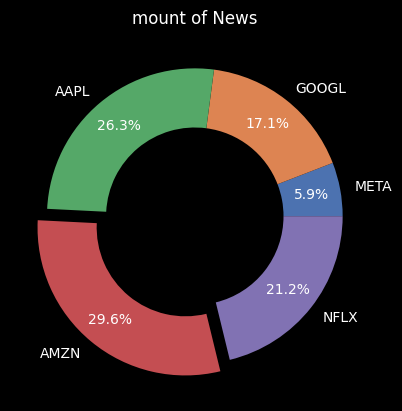

In [5]:
faang = ["META", "GOOGL", "AAPL", "AMZN", "NFLX"]
expand = [news[news.index ==n].shape[0] for n in faang]
plt.title("mount of News")
seperate = (0, 0, 0, .1, 0)

plt.pie(expand, labels = faang, colors = sns.color_palette("deep", n_colors=5), explode=seperate,
        radius=1, wedgeprops={'linewidth':1,'width':0.4}, autopct='%1.1f%%', pctdistance=0.8)
plt.savefig("../src/EDA/mount_new.png", transparent = True)

/tmp/ipykernel_308404/1138446998.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(news["score"])


<AxesSubplot: xlabel='score', ylabel='Density'>

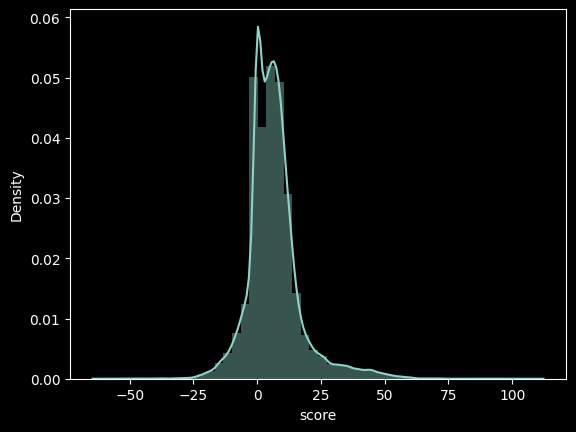

In [6]:
sns.distplot(news["score"])

/tmp/ipykernel_308404/1355877482.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(news["score"][news["score"]>0])


<AxesSubplot: xlabel='score', ylabel='Density'>

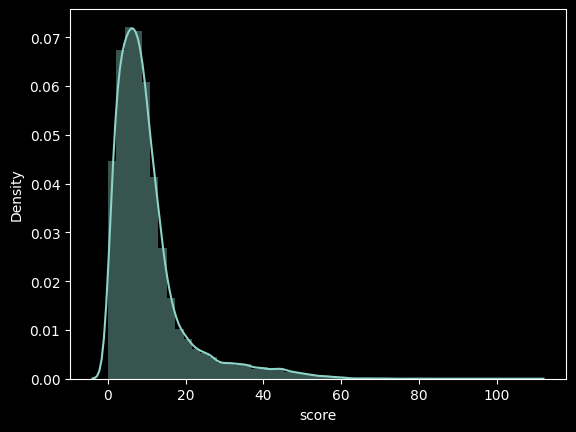

In [7]:
sns.distplot(news["score"][news["score"]>0])

In [9]:
# print(news["neu"])
faang = ["META", "GOOGL", "AAPL", "AMZN", "NFLX"]
state = ["pos", "neg", "neu"]
pos_num, neg_num, neu_num = [], [], []
for stock_name in faang:
    stock_news = news[(news.index == stock_name)]
    pos_num.append((stock_news["score"] >= 3).sum())
    neg_num.append((stock_news["score"] <= -3).sum())
    neu_num.append((abs(stock_news["score"]) < 3).sum())
tot_sum = [sum(x) for x in zip(pos_num, neu_num, neg_num)]
neu_sum = [int((pos+neu)*100/sum([pos, neu, neg])) 
                    for pos, neu, neg in zip(pos_num, neu_num, neg_num)]
pos_sum = [int(pos*100/sum([pos, neu, neg])) 
                    for pos, neu, neg in zip(pos_num, neu_num, neg_num)]


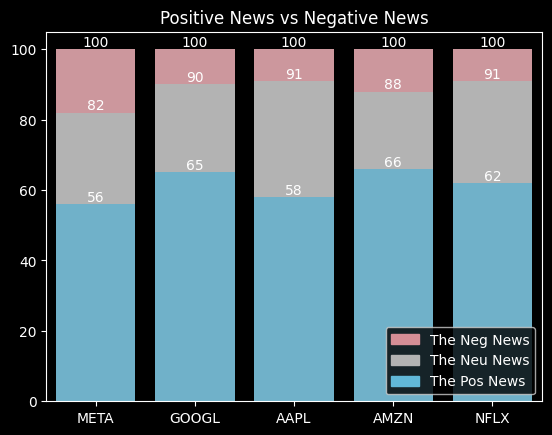

In [10]:
import matplotlib.patches as mp 
ax=sns.barplot(x=faang,y=[100 for _ in range(5)],color='#d58e96')
ax=sns.barplot(x=faang,y=neu_sum,color='#b3b3b3')
ax=sns.barplot(x=faang,y=pos_sum,color='#61b8d8')
for i in range(3): ax.bar_label(ax.containers[i])
blue_patch = mp.Patch(color='#61b8d8', label='The Pos News',)
red_patch = mp.Patch(color='#d58e96', label='The Neg News')
gray_patch = mp.Patch(color='#b3b3b3', label='The Neu News')
ax.legend(handles=[red_patch,gray_patch,  blue_patch, ], loc='lower right')
ax.set_title('Positive News vs Negative News')
plt.savefig("../src/EDA/pvn.png", transparent = True)

In [13]:
price = pd.read_csv("../data/stock.csv", index_col=0)
print(price)

              meta     goog      amzn    nflx      aapl
Date                                                   
2020-11-30  276.97  88.0370  158.4020  490.70  117.6378
2020-12-01  286.55  89.9050  161.0040  504.58  121.2643
2020-12-02  287.52  91.3975  160.1765  503.38  121.6200
2020-12-03  281.85  91.3385  159.3365  497.52  121.4817
2020-12-04  279.70  91.3995  158.1290  498.31  120.7999
...            ...      ...       ...     ...       ...
2022-12-12  114.71  93.5600   90.5500  315.18  144.4900
2022-12-13  120.15  95.8500   92.4900  320.34  145.4700
2022-12-14  121.59  95.3100   91.5800  317.83  143.2100
2022-12-15  116.15  91.2000   88.4500  290.41  136.5000
2022-12-16  119.91  90.3600   87.2099  292.76  134.6800

[517 rows x 5 columns]


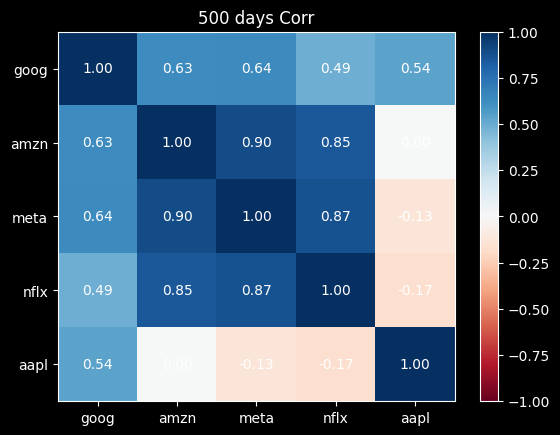

In [14]:
import ffn

price = price[['goog','amzn','meta','nflx', "aapl"]]
price.iloc[-500:].rebase().plot_corr_heatmap()
plt.title("500 days Corr")
plt.savefig("../src/corr2.jpg")

In [15]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader.data as web
import datetime
import yfinance as yf

import matplotlib.pyplot as plt
import mplfinance as mpf


In [16]:
for name in faang:
    df = yf.download(name, period='3mo')
    mpf.plot(df, type='candle',mav=(3, 6, 9), volume=True, style='mike',title = f"{name}", savefig=f"../src/EDA/{name}_price.png", )


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
